<a href="https://colab.research.google.com/github/amatyaagrata/Assignment-AI-/blob/main/2501611_AgrataAmatya(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report,
    roc_curve, auc,
    mean_squared_error, mean_absolute_error, r2_score
)

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.feature_selection import SelectKBest, chi2, f_regression

# Keras/TensorFlow Imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

print("✅ Libraries loaded successfully!")

✅ Libraries loaded successfully!


In [69]:
df_class = pd.read_csv('/content/bank.csv', sep=',')

df_class.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


• Provide a detailed description, including:

(a) When and by whom the dataset was created?

The dataset was created in 2012 by researchers at the University of Porto, Portugal. It records data from direct marketing campaigns conducted by a Portuguese bank to promote term deposit subscriptions.

(b) How and from where the dataset was accessed?

The dataset is publicly available through the UCI Machine Learning Repository at: https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset It was downloaded in CSV format for this project.

(c) How it aligns with the chosen UNSDG?

This dataset aligns with UNSDG 8:

- Decent Work and Economic Growth. Predicting client subscription behavior helps financial institutions optimize marketing campaigns, reduce operational costs, and improve economic efficiency, supporting responsible growth and financial decision-making.

EXPLORATORY DATA ANALYSIS

Inspect data

In [70]:
# Basic info
df_class.info()

# Summary statistics
df_class.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Check for missing values

In [71]:
missing = df_class.isnull().sum()
missing_percent = (missing / len(df_class)) * 100
pd.DataFrame({'Missing Count': missing, 'Missing %': missing_percent})


,Missing Count,Missing %
age,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0
default,0,0.0
balance,0,0.0
housing,0,0.0
loan,0,0.0
contact,0,0.0
day,0,0.0


Class distribution (target variable)

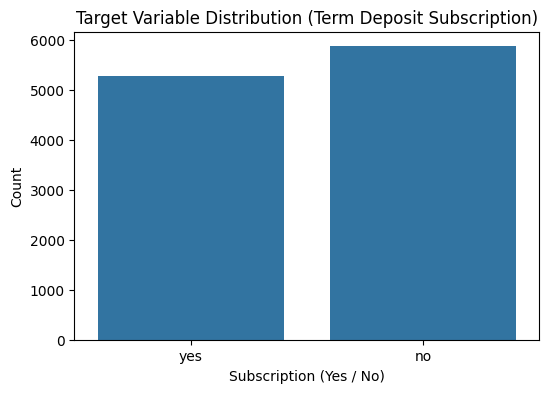

In [49]:
plt.figure(figsize=(6,4))
sns.countplot(x=df_bank['deposit'])
plt.title("Target Variable Distribution (Term Deposit Subscription)")
plt.xlabel("Subscription (Yes / No)")
plt.ylabel("Count")
plt.show()


Numerical feature distributions

<Figure size 1200x800 with 0 Axes>

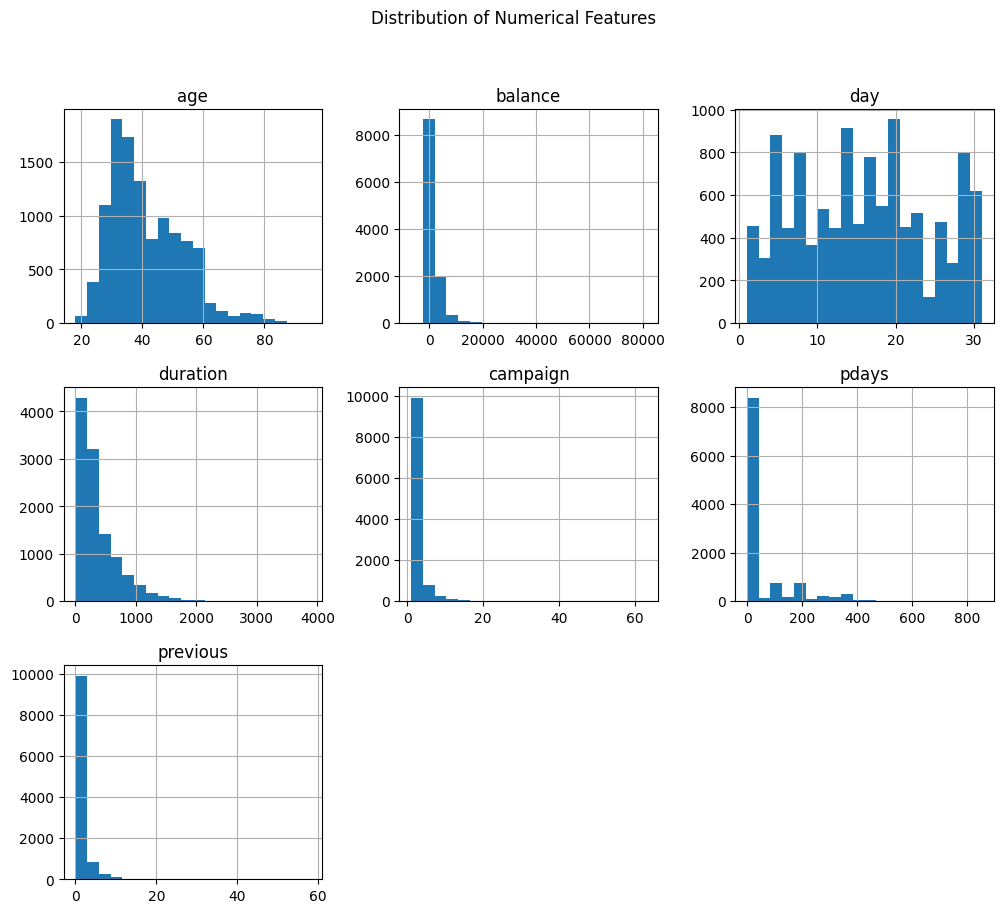

In [73]:
numerical_cols = df_class.select_dtypes(include=np.number).columns

plt.figure(figsize=(12,8))
df_class[numerical_cols].hist(bins=20, figsize=(12,10))
plt.suptitle("Distribution of Numerical Features")
plt.show()


Boxplots to detect outliers

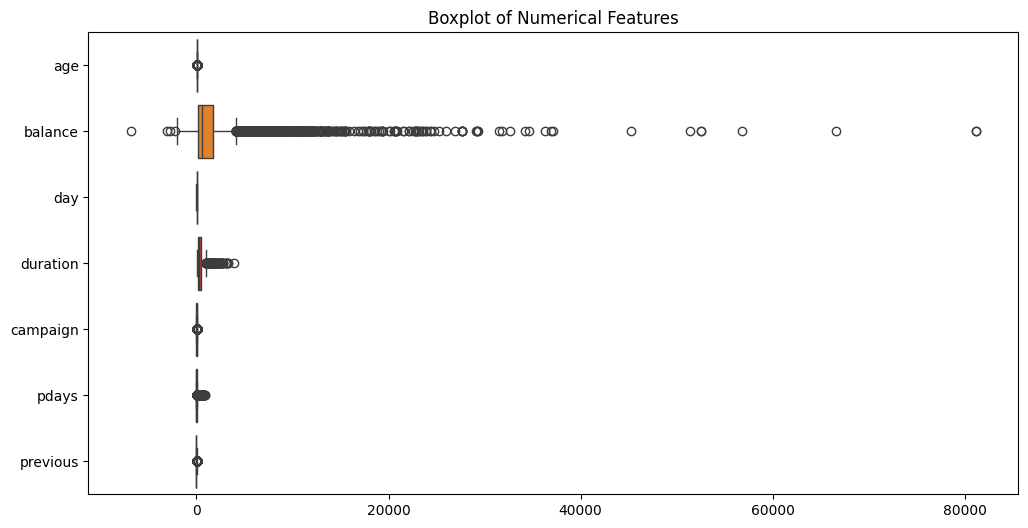

In [74]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_class[numerical_cols], orient='h')
plt.title("Boxplot of Numerical Features")
plt.show()


Correlation analysis (numerical features)

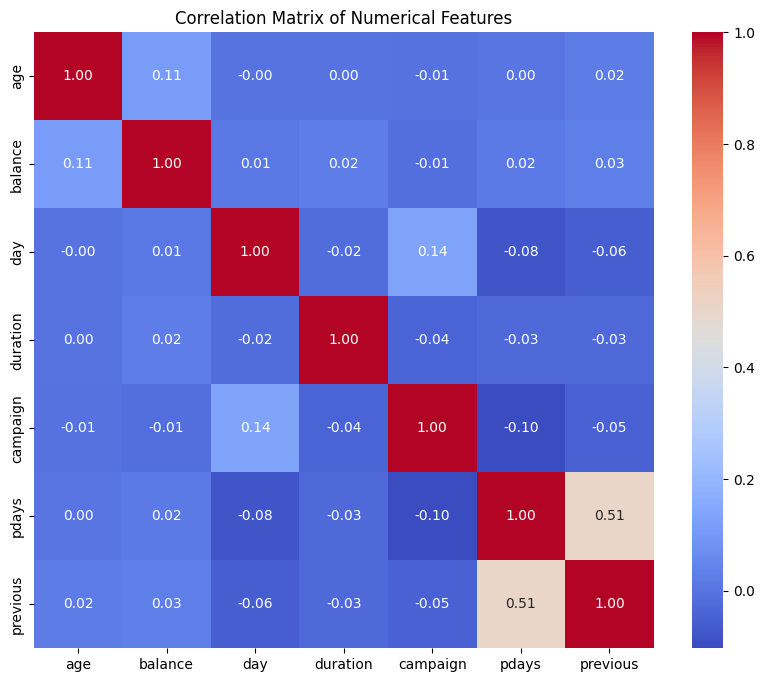

In [75]:
plt.figure(figsize=(10,8))
corr = df_class[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


Scatterplots vs target

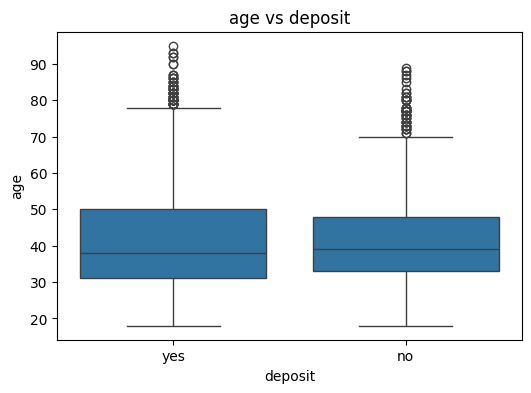

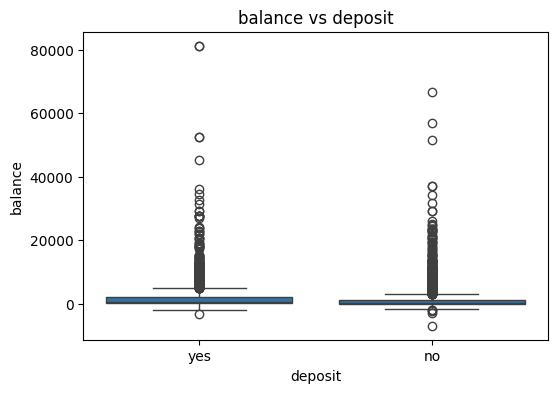

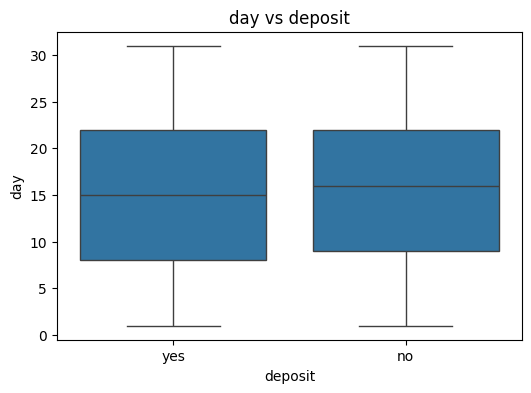

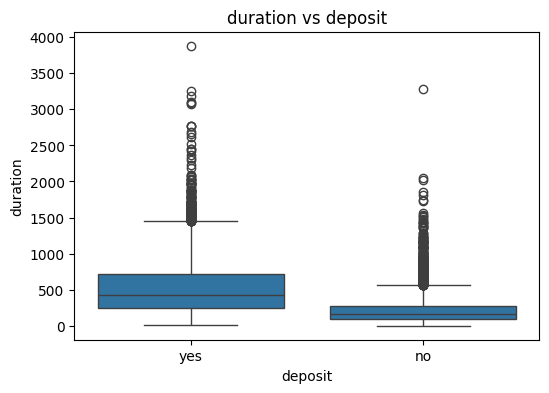

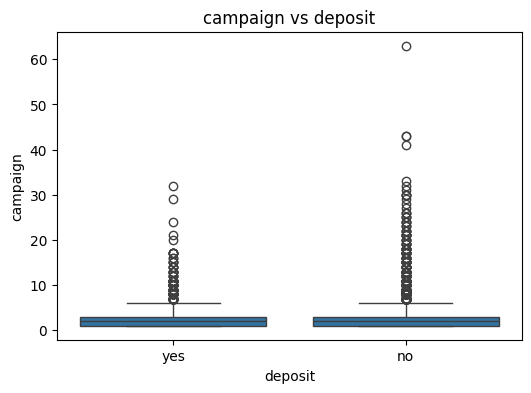

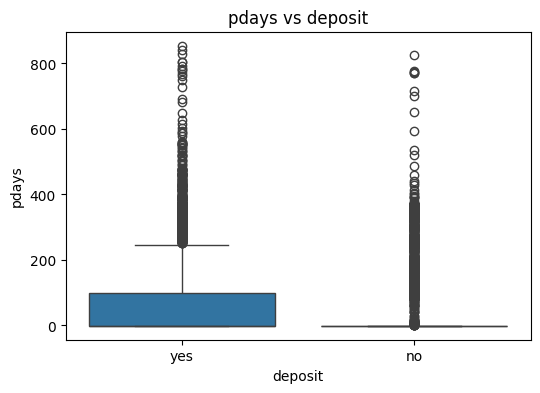

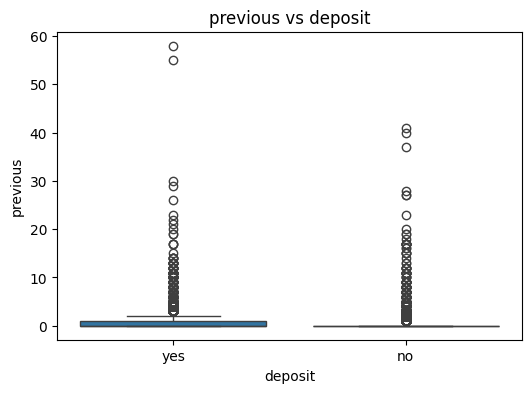

In [77]:
target = 'deposit'

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=target, y=df_class[col], data=df_class)
    plt.title(f"{col} vs {target}")
    plt.show()

Categorical features distributions

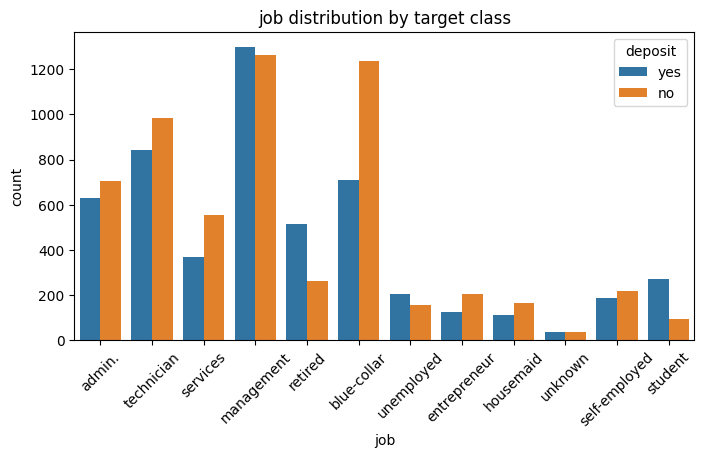

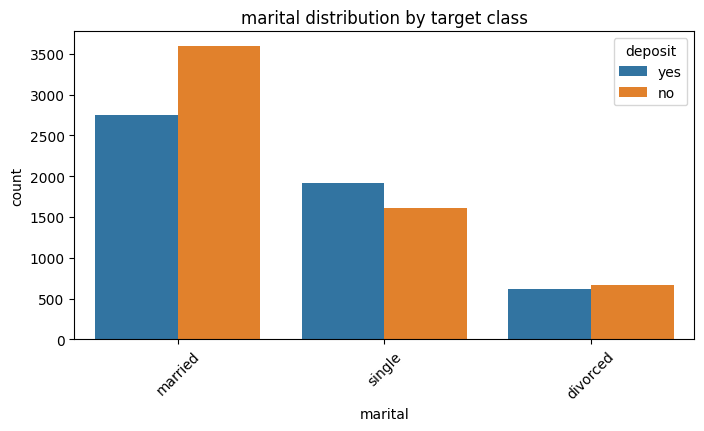

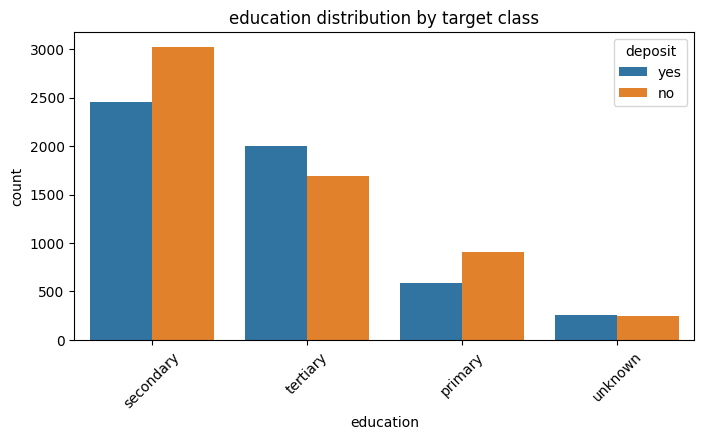

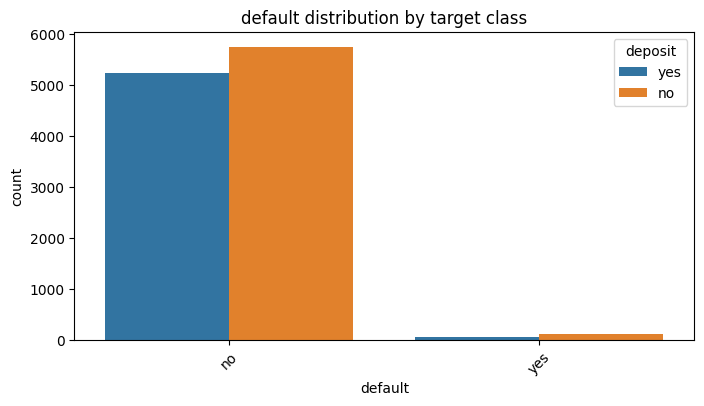

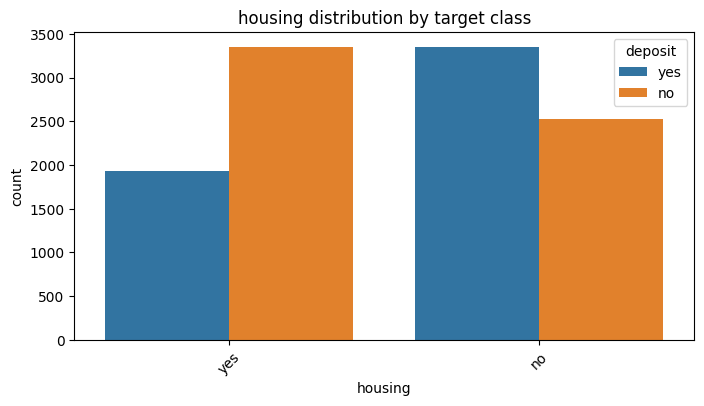

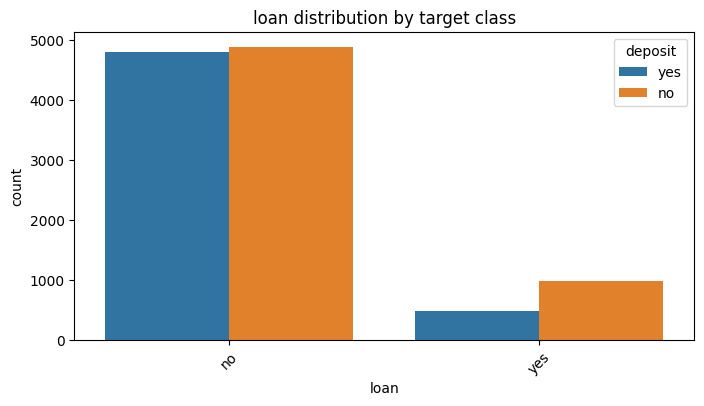

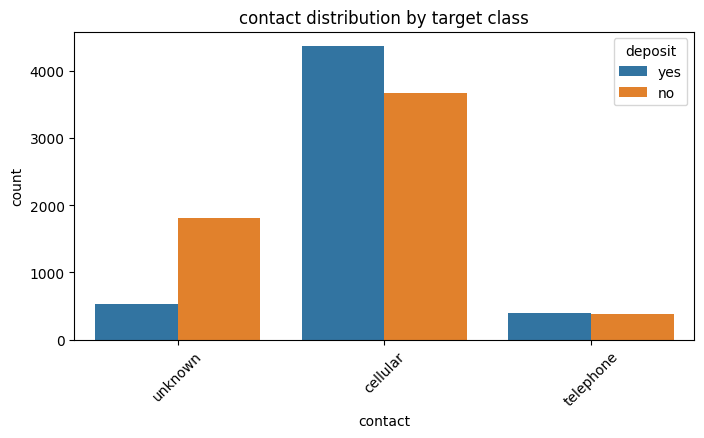

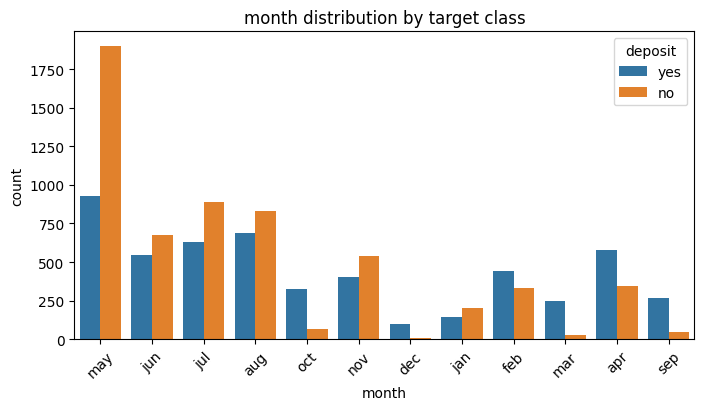

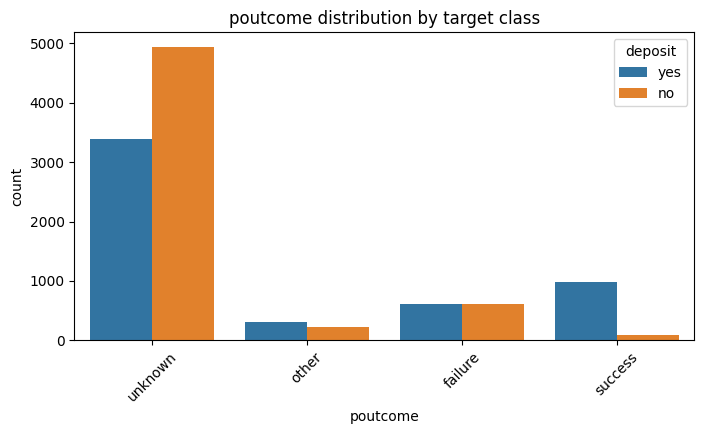

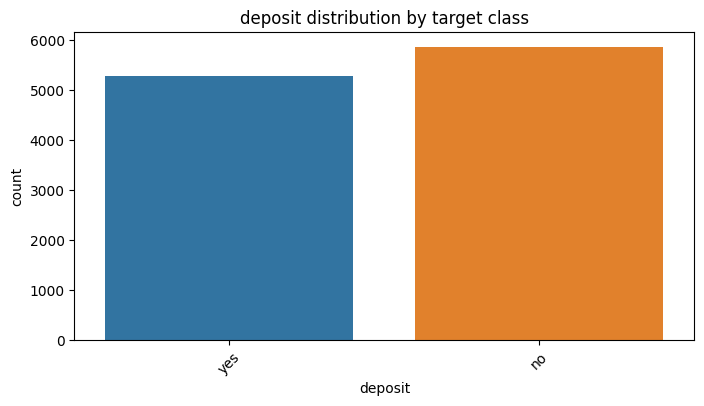

In [78]:
categorical_cols = df_class.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue=target, data=df_class)
    plt.title(f"{col} distribution by target class")
    plt.xticks(rotation=45)
    plt.show()


Pairplot for a subset of features

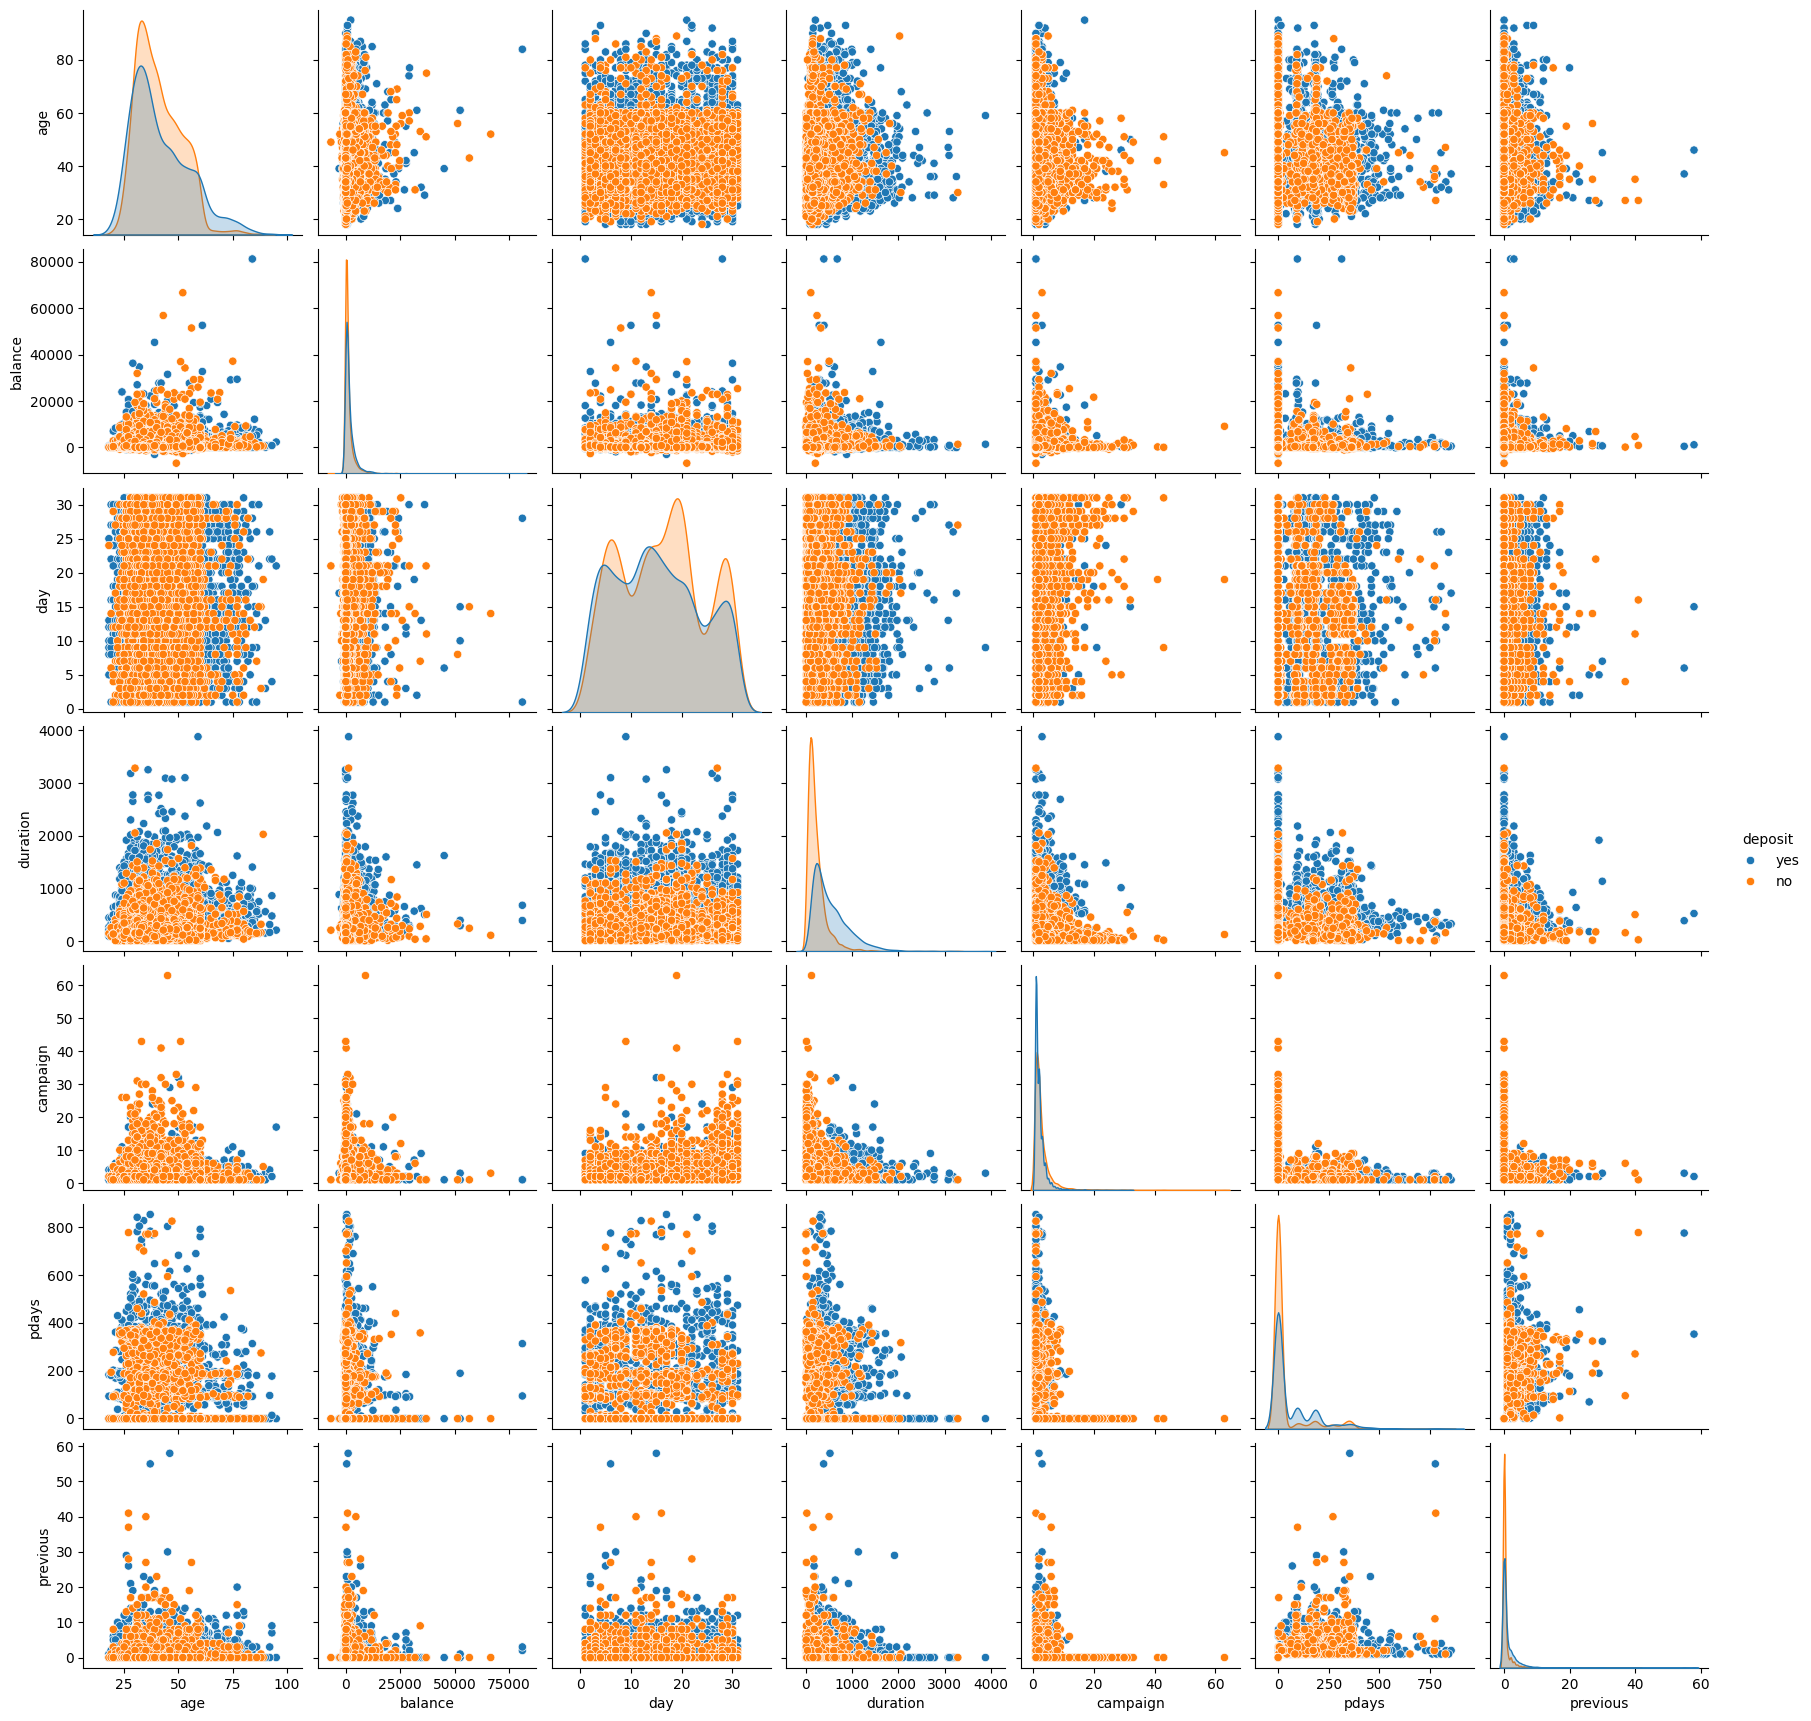

In [79]:
subset = numerical_cols.tolist() + [target]  # pick important numeric features
sns.pairplot(df_class[subset], hue=target)
plt.show()


NEURAL NETWORK CLASSIFIER

In [80]:
# Assuming df_class is your dataset
X = df_class.drop('deposit', axis=1)
y = df_class['deposit']

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Encode target
le = LabelEncoder()
y = le.fit_transform(y)  # 0 = no, 1 = yes

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Define Neural Network Architecture

Architecture Design:

- Input layer: n_features neurons

- Hidden Layer 1: 32 neurons, ReLU

- Hidden Layer 2: 16 neurons, ReLU

- Output Layer: 1 neuron, Sigmoid (binary classification)

- Loss function: Binary Crossentropy

- Optimizer: Adam

- Metrics: Accuracy

In [86]:
from tensorflow.keras.layers import Input

model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Proper input layer
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 32)             │         1,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,921 (7.50 KB)

 Trainable params: 1,921 (7.50 KB)

 Non-trainable params: 0 (0.00 B)

Train the Model

In [87]:
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=32,
                    verbose=1)


Epoch 1/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6028 - loss: 0.6550 - val_accuracy: 0.7508 - val_loss: 0.5139
Epoch 2/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7745 - loss: 0.4796 - val_accuracy: 0.8074 - val_loss: 0.4349
Epoch 3/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8019 - loss: 0.4396 - val_accuracy: 0.8124 - val_loss: 0.4176
Epoch 4/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8129 - loss: 0.4201 - val_accuracy: 0.8169 - val_loss: 0.4055
Epoch 5/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8277 - loss: 0.3945 - val_accuracy: 0.8337 - val_loss: 0.3952
Epoch 6/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8239 - loss: 0.3854 - val_accuracy: 0.8410 - val_loss: 0.3914
Epoch 7/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8402 - loss: 0.3701 - val_accuracy: 0.8382 - val_loss: 0.3873
Epoch 8/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8360 - loss: 0.3667 - val_accuracy: 0.

Evaluate Performance

In [88]:
# Predictions
y_train_pred = (model.predict(X_train) > 0.5).astype(int)
y_test_pred = (model.predict(X_test) > 0.5).astype(int)

# Metrics
def evaluate_classification(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred)
    }

print("Training Metrics:", evaluate_classification(y_train, y_train_pred))
print("Test Metrics:", evaluate_classification(y_test, y_test_pred))


280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Training Metrics: {'Accuracy': 0.8822936499048045, 'Precision': 0.8557046979865772, 'Recall': 0.9040415977310329, 'F1-Score': 0.8792092862889324}
Test Metrics: {'Accuracy': 0.8575906851768921, 'Precision': 0.8333333333333334, 'Recall': 0.8742911153119093, 'F1-Score': 0.8533210332103321}


Confusion Matrix

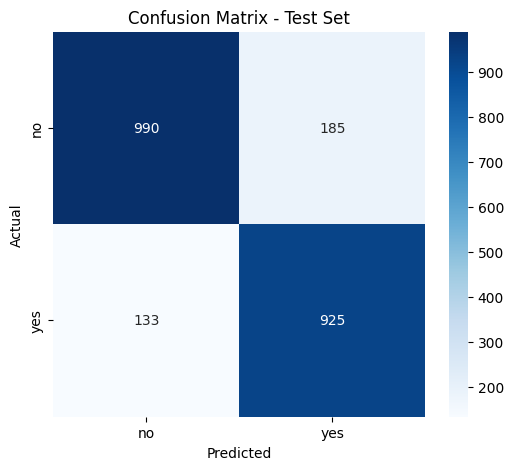

In [89]:
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Test Set")
plt.show()


Training History (Accuracy & Loss)

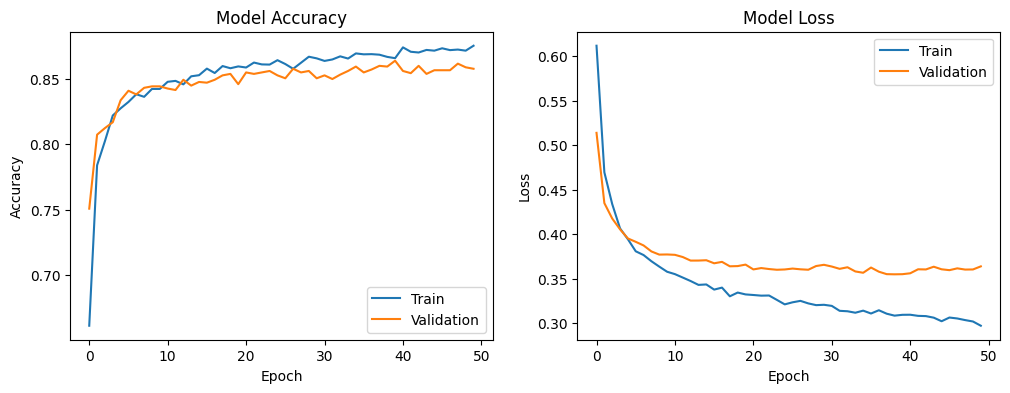

In [90]:
plt.figure(figsize=(12,4))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


PRIMARY MODELS (CLASSICAL ML)

Split the dataset

In [91]:
from sklearn.model_selection import train_test_split

# Assuming your features are in X and target in y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 8929
Testing samples: 2233


Build two classical ML models

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Logistic Regression with scaling
lr_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=5000))
lr_model.fit(X_train, y_train)



# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Evaluate models

In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

def evaluate_classification(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }

# Evaluate Logistic Regression
lr_results = evaluate_classification(lr_model, X_test, y_test)
# Evaluate Decision Tree
dt_results = evaluate_classification(dt_model, X_test, y_test)

# Convert to DataFrame for comparison
results_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree"],
    "Accuracy": [lr_results["Accuracy"], dt_results["Accuracy"]],
    "Precision": [lr_results["Precision"], dt_results["Precision"]],
    "Recall": [lr_results["Recall"], dt_results["Recall"]],
    "F1-Score": [lr_results["F1-Score"], dt_results["F1-Score"]]
})

print(results_df)


                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.825795   0.826979  0.799622  0.813071
1        Decision Tree  0.792208   0.785577  0.772212  0.778837


Compare models and conclude

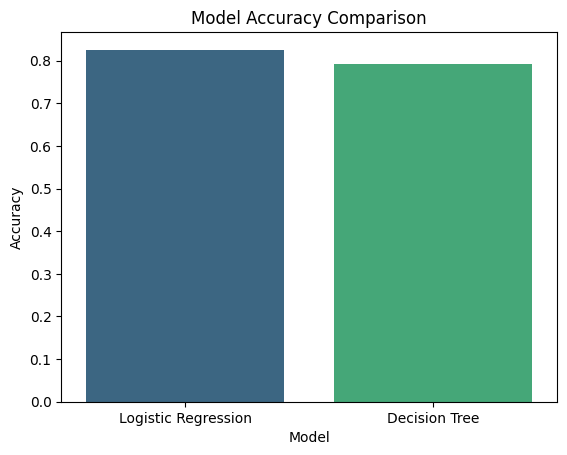

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

## Add a dummy column as hue
results_df["hue_dummy"] = results_df["Model"]

sns.barplot(x="Model", y="Accuracy", hue="hue_dummy", data=results_df,
            palette="viridis", dodge=False, legend=False)
plt.title("Model Accuracy Comparison")
plt.show()



HYPERPARAMETER TUNING(CV)

Identify Key Hyperparameters

1. Logistic Regression

- C (inverse of regularization strength)
- solver (algorithm to use)
- max_iter (number of iterations)
2. Decision Tree Classifier
- max_depth (maximum depth of tree)
- min_samples_split (min samples to split a node)
- min_samples_leaf (min samples at a leaf node)

Apply Cross-Validation

In [100]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=42))
])

param_grid_lr = {
    'lr__C': [0.01, 0.1, 1, 10],
    'lr__solver': ['lbfgs', 'liblinear'],
    'lr__max_iter': [500, 1000]
}

grid_lr = GridSearchCV(
    pipe_lr,
    param_grid_lr,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_lr.fit(X_train, y_train)

print("Best Logistic Regression params:", grid_lr.best_params_)
print("Best CV score:", grid_lr.best_score_)


Best Logistic Regression params: {'lr__C': 0.1, 'lr__max_iter': 500, 'lr__solver': 'liblinear'}
Best CV score: 0.8234959739774969


Evaluate Best Models on Test Set

In [101]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Logistic Regression
y_pred_lr = grid_lr.best_estimator_.predict(X_test)
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, y_pred_lr))

# Decision Tree
y_pred_dt = grid_dt.best_estimator_.predict(X_test)
print("Decision Tree Test Accuracy:", accuracy_score(y_test, y_pred_dt))


Logistic Regression Test Accuracy: 0.8262427227944469
Decision Tree Test Accuracy: 0.8222122704881325


Visualization of Hyperparameter Tuning

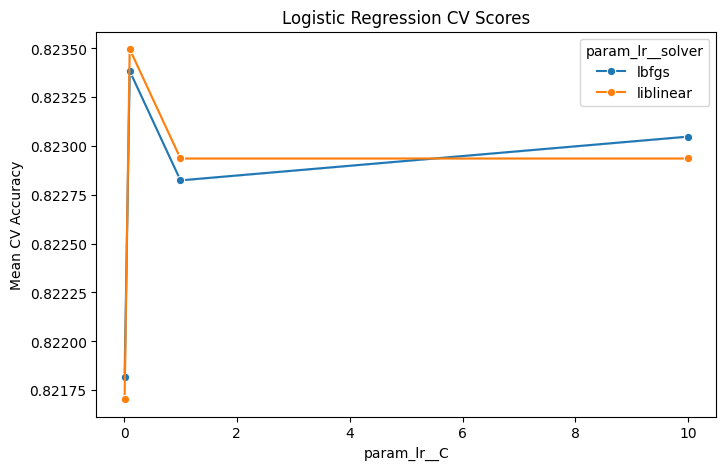

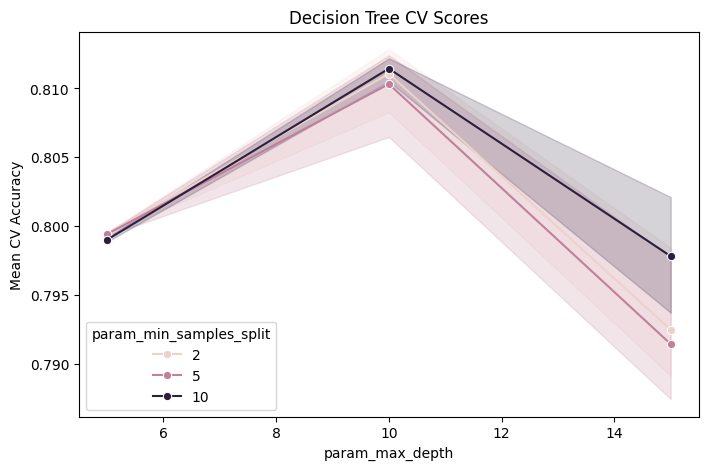

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Logistic Regression CV scores
cv_results_lr = pd.DataFrame(grid_lr.cv_results_)
plt.figure(figsize=(8,5))
sns.lineplot(x='param_lr__C', y='mean_test_score', hue='param_lr__solver', data=cv_results_lr, marker='o')
plt.title("Logistic Regression CV Scores")
plt.ylabel("Mean CV Accuracy")
plt.show()

# Decision Tree CV scores
cv_results_dt = pd.DataFrame(grid_dt.cv_results_)
plt.figure(figsize=(8,5))
sns.lineplot(x='param_max_depth', y='mean_test_score', hue='param_min_samples_split', data=cv_results_dt, marker='o')
plt.title("Decision Tree CV Scores")
plt.ylabel("Mean CV Accuracy")
plt.show()

FEATURE SELECTION (FILTER METHOD)

Feature Selection for Logistic Regression (Filter Method)

Why Filter Method (Chi-Square)?

- Works well with classification problems
- Measures statistical dependency between features and target
- Computationally efficient
- Model-independent (unbiased)

In [104]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Chi-square requires non-negative values
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

chi2_selector = SelectKBest(score_func=chi2, k=8)
X_train_chi2 = chi2_selector.fit_transform(X_train_scaled, y_train)

selected_features_lr = X_train.columns[chi2_selector.get_support()]
print("Selected Features (Logistic Regression):")
print(list(selected_features_lr))


Selected Features (Logistic Regression):
['duration', 'housing_yes', 'contact_unknown', 'month_mar', 'month_may', 'month_oct', 'month_sep', 'poutcome_success']


Feature Selection for Decision Tree (Embedded Method)

Why Embedded Method?

- Decision Trees naturally perform feature selection
- Based on information gain / Gini impurity
- Captures non-linear relationships
- No additional computation required

In [105]:
import pandas as pd

dt_model = grid_dt.best_estimator_
importances = dt_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

selected_features_dt = feature_importance_df[feature_importance_df['Importance'] > 0]['Feature']

print("Selected Features (Decision Tree):")
print(list(selected_features_dt))


Selected Features (Decision Tree):
['duration', 'poutcome_success', 'contact_unknown', 'age', 'housing_yes', 'day', 'balance', 'month_mar', 'pdays', 'month_oct', 'month_jun', 'month_jul', 'month_aug', 'month_feb', 'campaign', 'poutcome_unknown', 'month_nov', 'month_sep', 'month_may', 'loan_yes', 'job_services', 'job_student', 'job_unemployed', 'previous', 'education_secondary', 'poutcome_other', 'marital_married', 'contact_telephone', 'job_blue-collar', 'month_jan', 'marital_single', 'job_entrepreneur', 'job_management', 'education_tertiary', 'education_unknown', 'job_technician', 'job_retired']


FINAL MODELS (OPTIMIZED + SELECTED FEATURES)

Final Logistic Regression Model

In [107]:
# Create scaled datasets with selected features for final models
# Use a new StandardScaler to avoid conflicts with MinMaxScaler used for Chi2
fs_scaler = StandardScaler()

X_train_fs = fs_scaler.fit_transform(X_train[selected_features_lr])
X_test_fs = fs_scaler.transform(X_test[selected_features_lr])

Logistic Regression Final

In [111]:
lr_final = LogisticRegression(
    C=grid_lr.best_params_['lr__C'], # Access C from the pipeline's best params
    solver=grid_lr.best_params_['lr__solver'], # Access solver
    max_iter=1000
)
lr_final.fit(X_train_fs, y_train)
y_pred_lr_final = lr_final.predict(X_test_fs)

Final Decision Tree Model

In [123]:
from sklearn.tree import DecisionTreeClassifier

final_dt = DecisionTreeClassifier(
    **grid_dt.best_params_,
    random_state=42
)

# Explicitly create subsets for final Decision Tree model to ensure feature consistency
X_train_dt_final_subset = X_train[selected_features_dt]
X_test_dt_final_subset = X_test[selected_features_dt]

final_dt.fit(X_train_dt_final_subset, y_train)
y_pred_dt_final = final_dt.predict(X_test_dt_final_subset)

FINAL COMPARISON TABLE

In [115]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

final_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Features Used': [len(selected_features_lr), len(selected_features_dt)],
    'CV F1 Score': [grid_lr.best_score_, grid_dt.best_score_],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr_final),
        accuracy_score(y_test, y_pred_dt_final)
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr_final),
        precision_score(y_test, y_pred_dt_final)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr_final),
        recall_score(y_test, y_pred_dt_final)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_lr_final),
        f1_score(y_test, y_pred_dt_final)
    ]
})

final_results

,Model,Features Used,CV F1 Score,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,8,0.823496,0.812808,0.833333,0.756144,0.792864
1,Decision Tree,37,0.812856,0.820421,0.788411,0.848771,0.817478


Metric Comparison Bar Chart (MANDATORY)

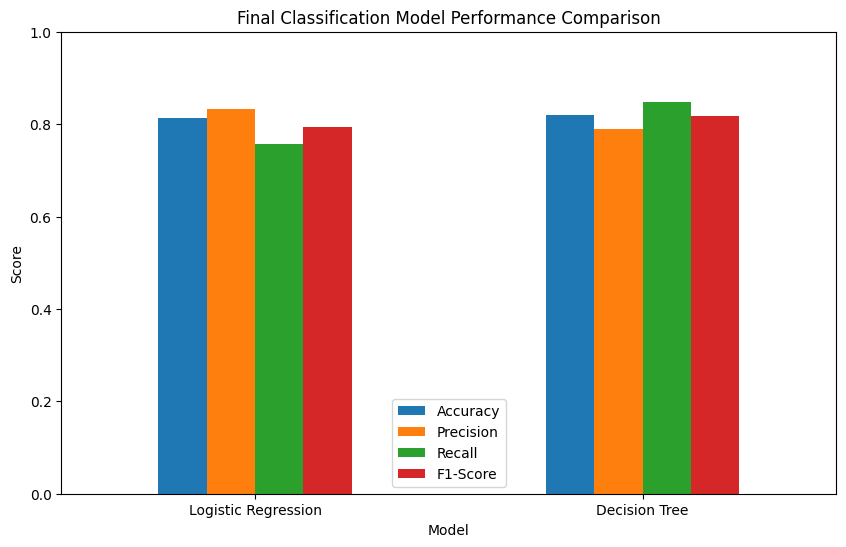

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

final_results.set_index("Model")[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(kind="bar", figsize=(10,6))
plt.title("Final Classification Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.show()

Confusion Matrix (Final Models)

Confusion Matrix (Final Models)

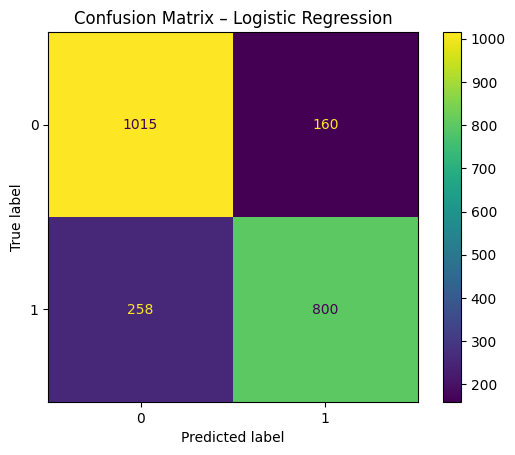

In [119]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    lr_final,
    X_test_fs,
    y_test
)
plt.title("Confusion Matrix – Logistic Regression")
plt.show()

Decision Tree

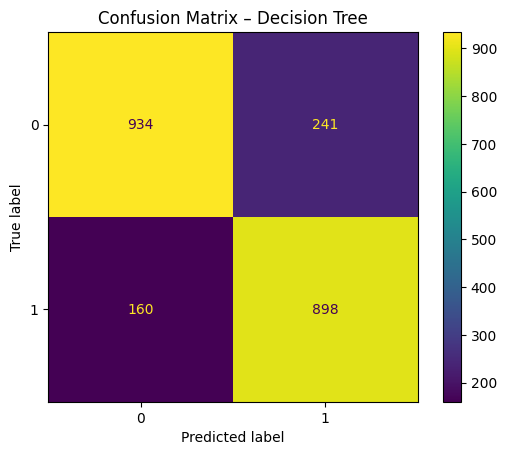

In [125]:
ConfusionMatrixDisplay.from_estimator(
    final_dt,
    X_test_dt_final_subset, # Use the consistently prepared test data
    y_test
)
plt.title("Confusion Matrix – Decision Tree")
plt.show()

ROC–AUC Curve (High-Mark Visualization)

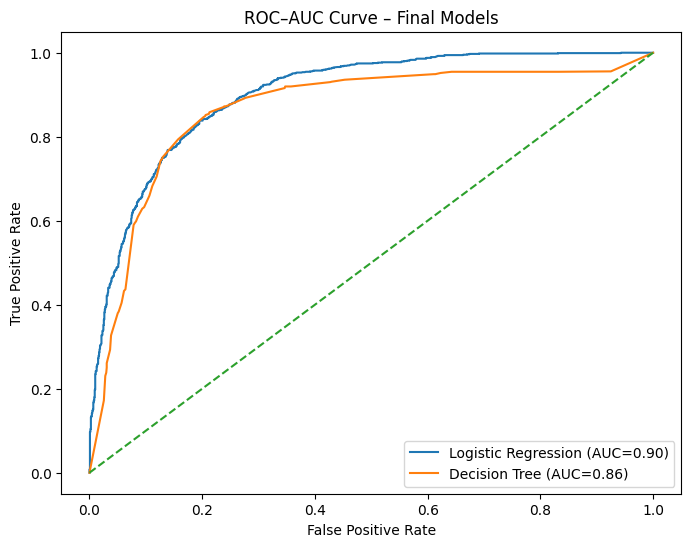

In [128]:
from sklearn.metrics import roc_curve, auc

y_prob_lr = lr_final.predict_proba(X_test_fs)[:,1]
y_prob_dt = final_dt.predict_proba(X_test_dt_final_subset)[:,1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)

plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC={auc(fpr_lr,tpr_lr):.2f})")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC={auc(fpr_dt,tpr_dt):.2f})")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC–AUC Curve – Final Models")
plt.legend()
plt.show()